# Fault-equivalent rewrites

This notebook serves as a practical guide to the fault-equivalent rewrites available in **PyZX**. It shows which rewrites are currently implemented and how they can be applied. 

Fault-equivalent rewrites are introduced in arXiv:2506.17181. An equivalent formulation, known as *distance-preserving rewrites*, is presented in arXiv:2410.17240. 

Examples are provided to demonstrate each rewrite.

In [1]:
import pyzx as zx
from pyzx import VertexType, EdgeType, Graph
from pyzx.graph.multigraph import Multigraph
from pyzx.rewrite_rules.unfuse_FE_rules import *
from pyzx.rewrite_rules.fuse_1_FE_rule import *
from pyzx.rewrite_rules.fuse_FE_rules import *

g = Graph()
v = g.add_vertex(VertexType.Z, 0, 0)
for i in range(4):
    nv = g.add_vertex(VertexType.BOUNDARY, 2 * (i // 2) - 1, 2 * (i % 2) - 1)
    g.add_edge((v, nv))

unfuse_4_FE(g, v)
zx.draw(g)

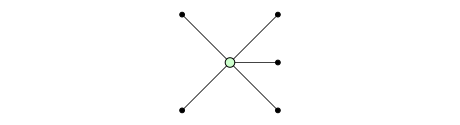

In [3]:
g = Multigraph()
v1 = g.add_vertex(VertexType.Z, 1, 1)
v2 = g.add_vertex(VertexType.Z, 1, -1)
v3 = g.add_vertex(VertexType.Z, -1, -1)
v4 = g.add_vertex(VertexType.Z, -1, 1)
v5 = g.add_vertex(VertexType.Z, 0, 1)
g.add_edge((v1, v2))
g.add_edge((v2, v3))
g.add_edge((v3, v4))
g.add_edge((v4, v5))
g.add_edge((v5, v1))
nv1 = g.add_vertex(VertexType.BOUNDARY, 2, 2)
nv2 = g.add_vertex(VertexType.BOUNDARY, 2, -2)
nv3 = g.add_vertex(VertexType.BOUNDARY, -2, -2)
nv4 = g.add_vertex(VertexType.BOUNDARY, -2, 2)
nv5 = g.add_vertex(VertexType.BOUNDARY, 0, 2)
g.add_edge((v1, nv1))
g.add_edge((v2, nv2))
g.add_edge((v3, nv3))
g.add_edge((v4, nv4))
g.add_edge((v5, nv5))

safe_fuse_5_FE(g, [v1, v2, v3, v4, v5])
zx.draw_matplotlib(g)

In [13]:
g = Graph()
v = g.add_vertex(VertexType.Z, 0, 0)
for i in range(5):
    nv = g.add_vertex(VertexType.BOUNDARY, 2 * (i // 2) - 1, 2 * (i % 2) - 1)
    g.add_edge((v, nv))

zx.draw(g)

unfuse_5_FE(g, v)
zx.draw(g)

In [14]:
import pyzx as zx
from pyzx import VertexType, EdgeType, Graph
from pyzx.graph.base import BaseGraph

def generate_zx_graph(N: int, W: int | None = None) -> BaseGraph:
    """
    Generates a ZX-diagram graph for the given N and W parameters.
    N can be any integer.
    """
    g = zx.Graph()
    # The position is calculated to keep the graph centered.
    v = g.add_vertex(VertexType.Z, (N - 1) / 2, 0)

    # Add N boundary vertices and connect them to the central spider
    for i in range(N):
        nv = g.add_vertex(VertexType.BOUNDARY, i, 1)
        g.add_edge((v, nv))

    return g, v

g, v = generate_zx_graph(7, None)
zx.draw(g)
recursive_unfuse_FE(g, v)
zx.draw(g)


In [15]:
g, v = generate_zx_graph(9, None)
zx.draw(g)
recursive_unfuse_FE(g, v)
zx.draw(g)